<a href="https://colab.research.google.com/github/Aprilianiput21/TA_Model-ETp/blob/main/EDA_Tungkub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EDA AWS Tungkub**



In [34]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [35]:
#Menyatukan 3 file data AWS Tungkub
data1 = pd.read_csv('/content/drive/MyDrive/Tugas Akhir_Putri Apriliani/Data Penelitian(Hobo)/AWS Tungkub/Data Tungkub 1.csv', skiprows = 1)
data2 = pd.read_csv('/content/drive/MyDrive/Tugas Akhir_Putri Apriliani/Data Penelitian(Hobo)/AWS Tungkub/Data Tungkub 2.csv', skiprows = 1)
data3 = pd.read_csv('/content/drive/MyDrive/Tugas Akhir_Putri Apriliani/Data Penelitian(Hobo)/AWS Tungkub/Data Tungkub 3.csv', skiprows =1)
df = pd.concat([data1, data2, data3], ignore_index=True)
df.head()

,#,"Date Time, GMT+07:00","Solar Radiation, W/m² (LGR S/N: 21533915, SEN S/N: 21281112, LBL: solar)","Wind Speed, m/s (LGR S/N: 21533915, SEN S/N: 21487882)","Temp, °C (LGR S/N: 21533915, SEN S/N: 21501590)","RH, % (LGR S/N: 21533915, SEN S/N: 21501590)"
0,1,02/13/23 12:00:02 PM,438.1,1.00,29.312,70.219
1,2,02/13/23 01:00:02 PM,375.6,1.67,29.676,69.697
2,3,02/13/23 02:00:02 PM,323.1,1.34,28.110,78.695
3,4,02/13/23 03:00:02 PM,214.4,1.00,26.588,76.712
4,5,02/13/23 04:00:02 PM,210.6,0.67,27.767,76.011


In [36]:
#Rename columns untuk mempermudah membaca nama kolom
df = df.rename(columns = { 'Date Time, GMT+07:00' : "Date Time", 'Solar Radiation, W/m² (LGR S/N: 21533915, SEN S/N: 21281112, LBL: solar)' : "Rs, W/m²", 'Wind Speed, m/s (LGR S/N: 21533915, SEN S/N: 21487882)' : "u, m/s", 'Temp, °C (LGR S/N: 21533915, SEN S/N: 21501590)' : "T, °C", 'RH, % (LGR S/N: 21533915, SEN S/N: 21501590)' : "RH, %"})
df.head()

,#,Date Time,"Rs, W/m²","u, m/s","T, °C","RH, %"
0,1,02/13/23 12:00:02 PM,438.1,1.00,29.312,70.219
1,2,02/13/23 01:00:02 PM,375.6,1.67,29.676,69.697
2,3,02/13/23 02:00:02 PM,323.1,1.34,28.110,78.695
3,4,02/13/23 03:00:02 PM,214.4,1.00,26.588,76.712
4,5,02/13/23 04:00:02 PM,210.6,0.67,27.767,76.011


In [37]:
#Code memisahkan antara Date dan Time
df['Date Time'] = pd.to_datetime(df['Date Time'])
df['Date'] = df['Date Time'].dt.date
df['Time'] = df['Date Time'].dt.time
df.head()

,#,Date Time,"Rs, W/m²","u, m/s","T, °C","RH, %",Date,Time
0,1,2023-02-13 12:00:02,438.1,1.00,29.312,70.219,2023-02-13,12:00:02
1,2,2023-02-13 13:00:02,375.6,1.67,29.676,69.697,2023-02-13,13:00:02
2,3,2023-02-13 14:00:02,323.1,1.34,28.110,78.695,2023-02-13,14:00:02
3,4,2023-02-13 15:00:02,214.4,1.00,26.588,76.712,2023-02-13,15:00:02
4,5,2023-02-13 16:00:02,210.6,0.67,27.767,76.011,2023-02-13,16:00:02


In [38]:
#Code mengubah Time menjadi bentuk Float (Desimal)
df['Time'] = df['Time'].astype(str)

# Memisahkan jam dan menit
hour_minute = df['Time'].str.split(':', expand=True)

# Mengubah jam dan menit menjadi float dan menggabungkannya
df['Time'] = hour_minute[0].astype(float) + hour_minute[1].astype(float) / 60

df.head()

,#,Date Time,"Rs, W/m²","u, m/s","T, °C","RH, %",Date,Time
0,1,2023-02-13 12:00:02,438.1,1.00,29.312,70.219,2023-02-13,12.0
1,2,2023-02-13 13:00:02,375.6,1.67,29.676,69.697,2023-02-13,13.0
2,3,2023-02-13 14:00:02,323.1,1.34,28.110,78.695,2023-02-13,14.0
3,4,2023-02-13 15:00:02,214.4,1.00,26.588,76.712,2023-02-13,15.0
4,5,2023-02-13 16:00:02,210.6,0.67,27.767,76.011,2023-02-13,16.0


In [39]:
#Mencari DOY (Day of Year)
df['Date'] = pd.to_datetime(df['Date'])
df['DayOfYear'] = df['Date'].dt.dayofyear
df.head()

,#,Date Time,"Rs, W/m²","u, m/s","T, °C","RH, %",Date,Time,DayOfYear
0,1,2023-02-13 12:00:02,438.1,1.00,29.312,70.219,2023-02-13,12.0,44
1,2,2023-02-13 13:00:02,375.6,1.67,29.676,69.697,2023-02-13,13.0,44
2,3,2023-02-13 14:00:02,323.1,1.34,28.110,78.695,2023-02-13,14.0,44
3,4,2023-02-13 15:00:02,214.4,1.00,26.588,76.712,2023-02-13,15.0,44
4,5,2023-02-13 16:00:02,210.6,0.67,27.767,76.011,2023-02-13,16.0,44


In [40]:
#Code untuk mengetaahui info dari DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5758 entries, 0 to 5757
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   #          5758 non-null   int64         
 1   Date Time  5758 non-null   datetime64[ns]
 2   Rs, W/m²   5758 non-null   float64       
 3   u, m/s     5758 non-null   float64       
 4   T, °C      5758 non-null   float64       
 5   RH, %      5758 non-null   float64       
 6   Date       5758 non-null   datetime64[ns]
 7   Time       5758 non-null   float64       
 8   DayOfYear  5758 non-null   int64         
dtypes: datetime64[ns](2), float64(5), int64(2)
memory usage: 405.0 KB


In [41]:
#Code mengubah nilai 0.0 pada Column U menjadi Nan
df["u, m/s"].replace(0.0, np.nan , inplace = True)
df.head()

,#,Date Time,"Rs, W/m²","u, m/s","T, °C","RH, %",Date,Time,DayOfYear
0,1,2023-02-13 12:00:02,438.1,1.00,29.312,70.219,2023-02-13,12.0,44
1,2,2023-02-13 13:00:02,375.6,1.67,29.676,69.697,2023-02-13,13.0,44
2,3,2023-02-13 14:00:02,323.1,1.34,28.110,78.695,2023-02-13,14.0,44
3,4,2023-02-13 15:00:02,214.4,1.00,26.588,76.712,2023-02-13,15.0,44
4,5,2023-02-13 16:00:02,210.6,0.67,27.767,76.011,2023-02-13,16.0,44


In [42]:
#Code untuk mengetahui missing data
missing_data = df.isnull()
missing_data.head()

#Output
#True means the value is a missing value
#False means the value is not missing value

,#,Date Time,"Rs, W/m²","u, m/s","T, °C","RH, %",Date,Time,DayOfYear
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [43]:
for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print("")


#
False    5758
Name: #, dtype: int64

Date Time
False    5758
Name: Date Time, dtype: int64

Rs, W/m²
False    5758
Name: Rs, W/m², dtype: int64

u, m/s
False    3414
True     2344
Name: u, m/s, dtype: int64

T, °C
False    5758
Name: T, °C, dtype: int64

RH, %
False    5758
Name: RH, %, dtype: int64

Date
False    5758
Name: Date, dtype: int64

Time
False    5758
Name: Time, dtype: int64

DayOfYear
False    5758
Name: DayOfYear, dtype: int64



In [44]:
#Mengubah nilai Nan pada Column U menjadi nilai 0.2
df['u, m/s'].replace(np.nan, 0.2, inplace=True)
df.head()

,#,Date Time,"Rs, W/m²","u, m/s","T, °C","RH, %",Date,Time,DayOfYear
0,1,2023-02-13 12:00:02,438.1,1.00,29.312,70.219,2023-02-13,12.0,44
1,2,2023-02-13 13:00:02,375.6,1.67,29.676,69.697,2023-02-13,13.0,44
2,3,2023-02-13 14:00:02,323.1,1.34,28.110,78.695,2023-02-13,14.0,44
3,4,2023-02-13 15:00:02,214.4,1.00,26.588,76.712,2023-02-13,15.0,44
4,5,2023-02-13 16:00:02,210.6,0.67,27.767,76.011,2023-02-13,16.0,44


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5758 entries, 0 to 5757
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   #          5758 non-null   int64         
 1   Date Time  5758 non-null   datetime64[ns]
 2   Rs, W/m²   5758 non-null   float64       
 3   u, m/s     5758 non-null   float64       
 4   T, °C      5758 non-null   float64       
 5   RH, %      5758 non-null   float64       
 6   Date       5758 non-null   datetime64[ns]
 7   Time       5758 non-null   float64       
 8   DayOfYear  5758 non-null   int64         
dtypes: datetime64[ns](2), float64(5), int64(2)
memory usage: 405.0 KB


In [46]:
df.describe()

,#,"Rs, W/m²","u, m/s","T, °C","RH, %",Time,DayOfYear
count,5758.000000,5758.000000,5758.000000,5758.000000,5758.000000,5758.000000,5758.000000
mean,1275.093088,192.608823,-29.870189,26.423263,81.236385,11.503647,214.217958
std,967.163299,303.245598,161.268313,3.770731,12.201391,6.924133,83.687612
min,1.000000,-888.900000,-888.880000,19.124000,39.576000,0.000000,44.000000
25%,480.250000,0.600000,0.200000,23.735000,70.789250,5.250000,163.000000
50%,1017.500000,4.400000,0.330000,25.708000,85.600500,12.000000,223.000000
75%,1990.750000,264.400000,0.670000,29.269000,91.276750,17.750000,283.000000
max,3430.000000,1276.900000,2.670000,128.830000,99.997000,23.000000,343.000000


In [47]:
#Code untuk menyimpan File
file_path_output = 'Data Tungkub_Merged.xlsx'
df.to_excel(file_path_output, index=False)


In [ ]:
import seaborn as sns

(33.353260285276285, 102.39946379593923)

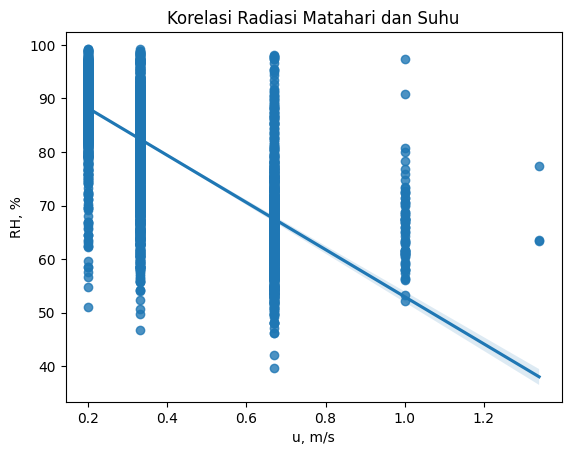

In [ ]:
sns.regplot(x= 'u, m/s', y = 'RH, %', data= df).set_title("Korelasi Radiasi Matahari dan Suhu")
plt.ylim()


(18.25581810557595, 37.355819782904994)

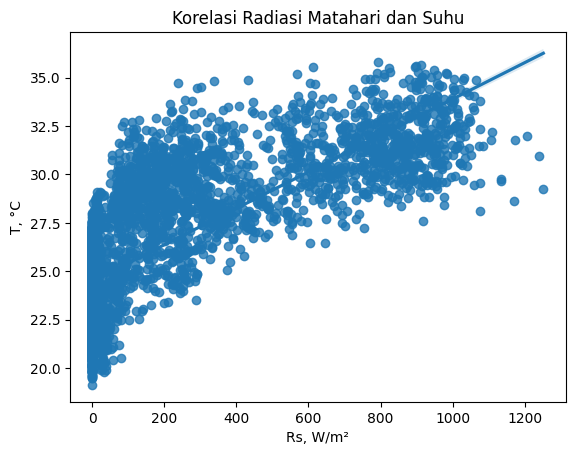

In [ ]:
sns.regplot(x= 'Rs, W/m²', y = 'T, °C', data= df).set_title("Korelasi Radiasi Matahari dan Suhu")
plt.ylim()



(18.217279567495048, 38.165129082603954)

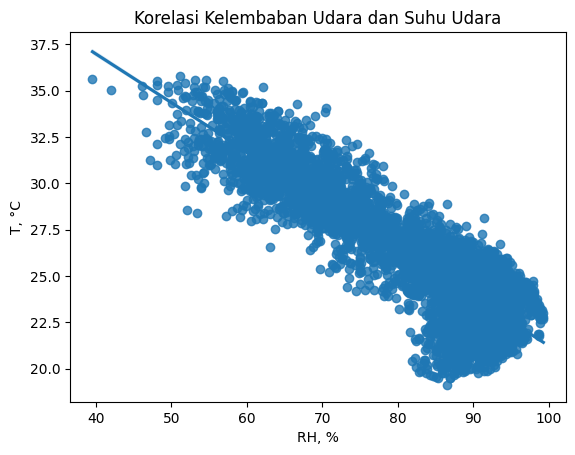

In [ ]:
sns.regplot(x= 'RH, %', y = 'T, °C', data= df).set_title("Korelasi Kelembaban Udara dan Suhu Udara")
plt.ylim()

(-236.8391333952667, 1322.792339685489)

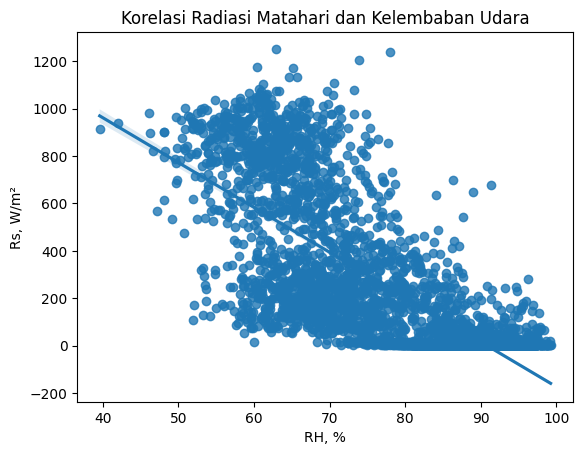

In [ ]:
sns.regplot(x= 'RH, %', y = 'Rs, W/m²', data= df).set_title("Korelasi Radiasi Matahari dan Kelembaban Udara")
plt.ylim()

Text(0, 0.5, 'RH, %')

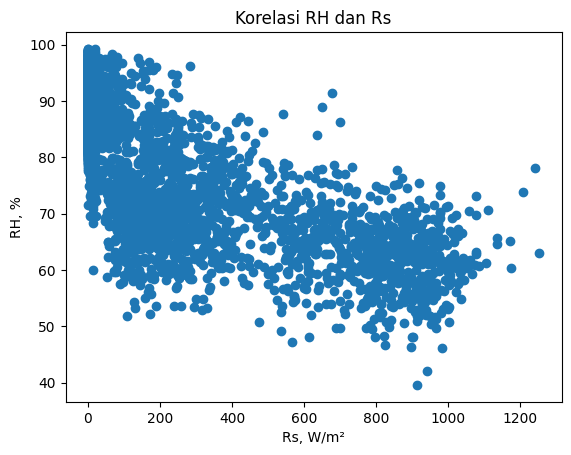

In [ ]:
y = df['RH, %']
x = df['Rs, W/m²']
plt.scatter(x,y)

plt.title("Korelasi RH dan Rs")
plt.xlabel('Rs, W/m²')
plt.ylabel('RH, %')